In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [54]:
df= pd.read_csv(r'E:\Mumbai Flat Real Estate Intelligence\datasets\mumbai_properties_cleaned_v2.csv')

In [55]:
df.head()

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
0,0.08,1,1,0,recent construction,Palghar,540.0,Furnished
1,0.17,1,1,2,recent construction,Nalasopara West,550.0,Furnished
2,0.18,1,1,0,recent construction,others,665.0,Furnished
3,0.18,1,1,2,recent construction,Palghar,630.0,Furnished
4,0.18,1,1,2,recent construction,Palghar,630.0,Unfurnished


In [56]:
df.shape

(9667, 8)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9666 non-null   float64
 1   bedrooms         9667 non-null   int64  
 2   bathrooms        9667 non-null   int64  
 3   balcony          9667 non-null   object 
 4   property_age     9650 non-null   object 
 5   major_location   9667 non-null   object 
 6   built_up_area    9667 non-null   float64
 7   furnishing_type  9667 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 604.3+ KB


In [58]:
df.duplicated().sum()

np.int64(7)

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.head()

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
0,0.08,1,1,0,recent construction,Palghar,540.0,Furnished
1,0.17,1,1,2,recent construction,Nalasopara West,550.0,Furnished
2,0.18,1,1,0,recent construction,others,665.0,Furnished
3,0.18,1,1,2,recent construction,Palghar,630.0,Furnished
4,0.18,1,1,2,recent construction,Palghar,630.0,Unfurnished


In [61]:
location_counts = df['major_location'].value_counts()

df['major_location'] = df['major_location'].apply(
    lambda x: x if location_counts[x] >= 3 else 'Other'
)


In [62]:
df['major_location'].value_counts().shape

(115,)

In [63]:
df['major_location'].value_counts(ascending=False)

major_location
Mira Road East                  629
Chembur                         540
Andheri West                    522
Powai                           514
Kandivali East                  489
Virar West                      374
Mulund West                     304
Borivali West                   280
Goregaon East                   265
Malad West                      248
Bhandup West                    242
Borivali East                   234
Lower Parel                     227
Andheri East                    219
Dadar West                      208
Kandivali West                  205
Naigaon East                    197
Santacruz West                  170
others                          163
Nalasopara West                 158
Goregaon West                   156
Mulund East                     154
Wadala East                     152
Wadala                          132
Sion                            128
Kanjurmarg East                 116
Bandra West                     116
Dadar East   

In [64]:
df['major_location'] = df['major_location'].replace('Other', 'others')

### major_location

In [65]:
# unique sectors
df['major_location'].value_counts().shape

(114,)

<Axes: xlabel='major_location'>

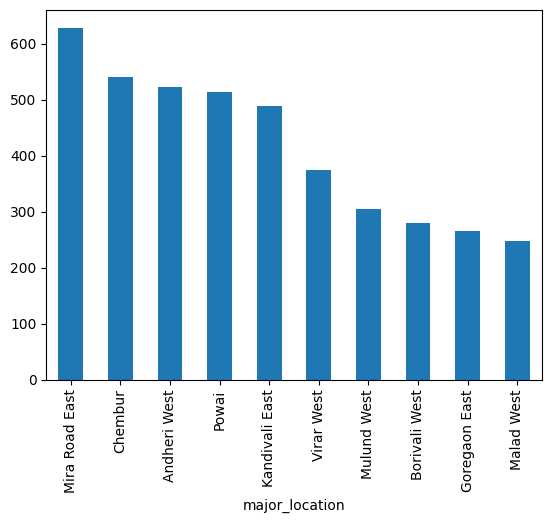

In [66]:
df['major_location'].value_counts().head(10).plot(kind='bar')

In [67]:
# Frequency distribution for major_location
major_location_counts = df['major_location'].value_counts()

major_location_frequency_bins = {
    "Very High (>100)": (major_location_counts > 100).sum(),
    "High (50-100)": ((major_location_counts >= 50) & (major_location_counts <= 100)).sum(),
    "Average (10-49)": ((major_location_counts >= 10) & (major_location_counts < 50)).sum(),
    "Low (2-9)": ((major_location_counts > 1) & (major_location_counts < 10)).sum(),
    "Very Low (1)": (major_location_counts == 1).sum()
}

major_location_frequency_bins

{'Very High (>100)': np.int64(30),
 'High (50-100)': np.int64(17),
 'Average (10-49)': np.int64(30),
 'Low (2-9)': np.int64(37),
 'Very Low (1)': np.int64(0)}

### price


In [68]:
df['price'].isnull().sum()

np.int64(1)

In [69]:
df['price'].describe()

count    9659.000000
mean        3.126957
std         3.084654
min         0.080000
25%         1.150000
50%         2.150000
75%         3.830000
max        30.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

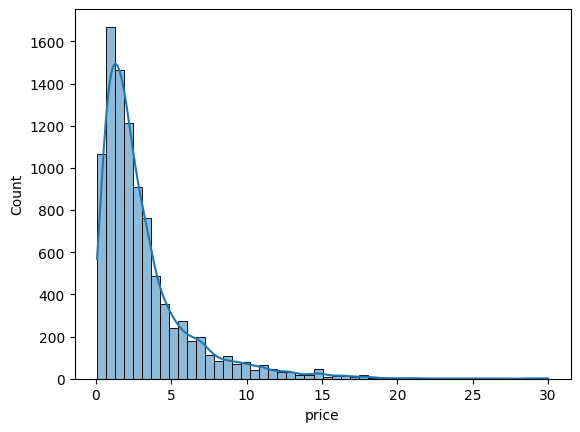

In [70]:
sns.histplot(df['price'], kde=True, bins=50)

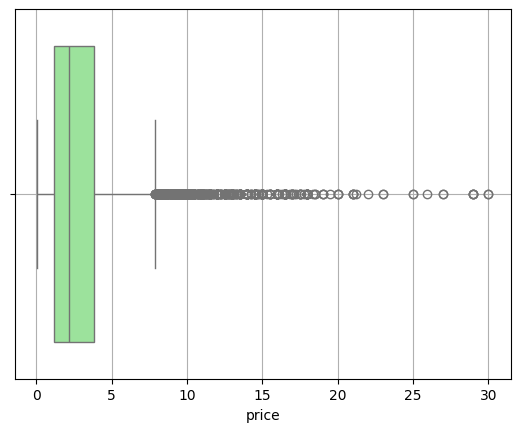

In [71]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [72]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

2.5432423621759 9.589259338774301


In [73]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.27
0.05     0.38
0.95     9.50
0.99    15.00
Name: price, dtype: float64

In [74]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(2.68)

In [75]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-2.8700000000000006 7.8500000000000005


In [76]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(726, 8)

In [77]:
outliers['price'].describe()

count    726.000000
mean      11.541143
std        3.553959
min        7.900000
25%        9.000000
50%       10.500000
75%       13.000000
max       30.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

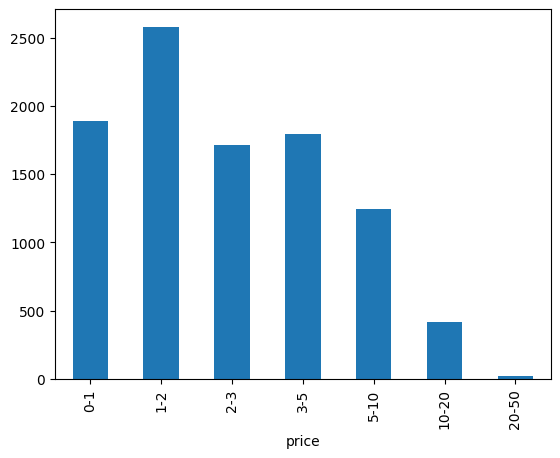

In [78]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

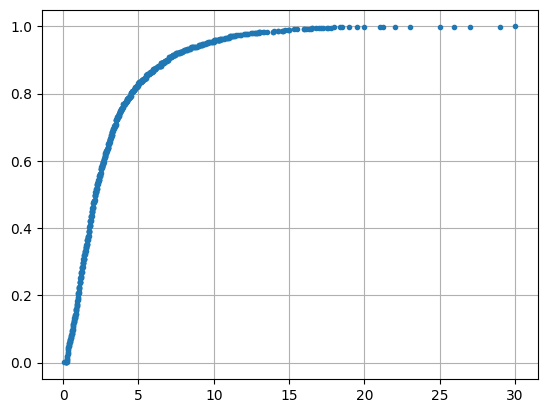

In [79]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

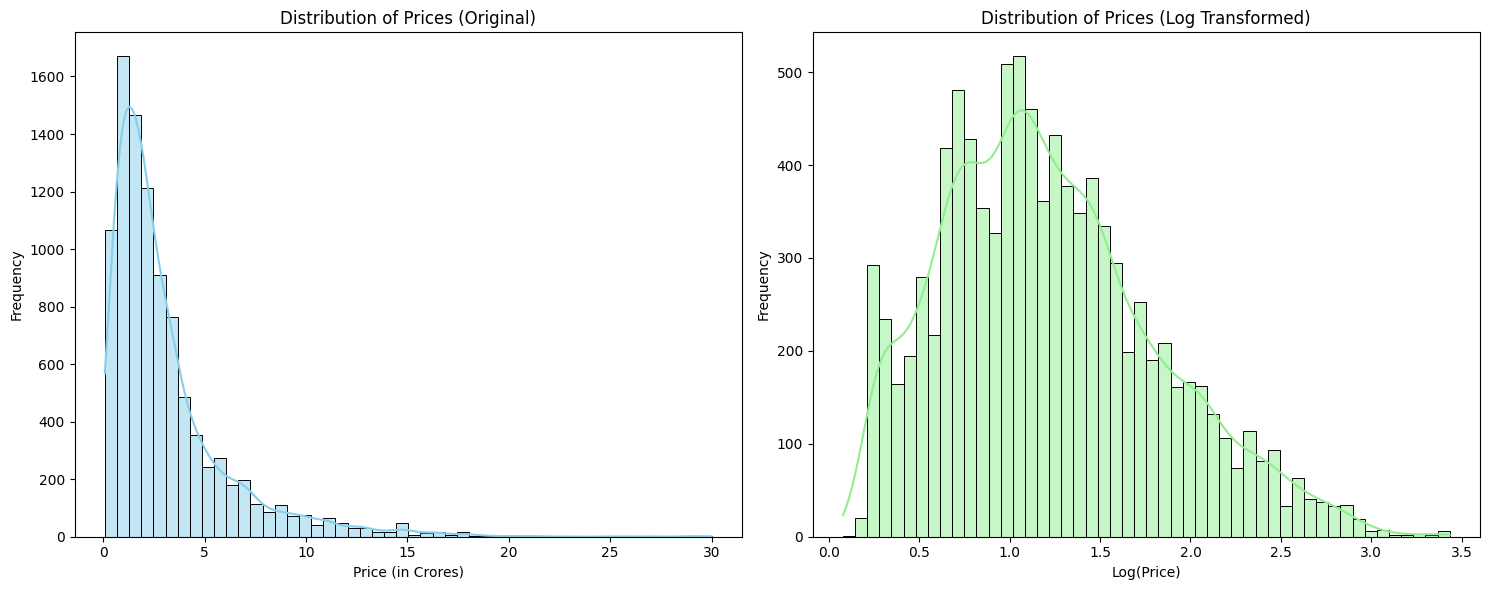

In [80]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [81]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

0.5760338242177575 -0.04027274100874845


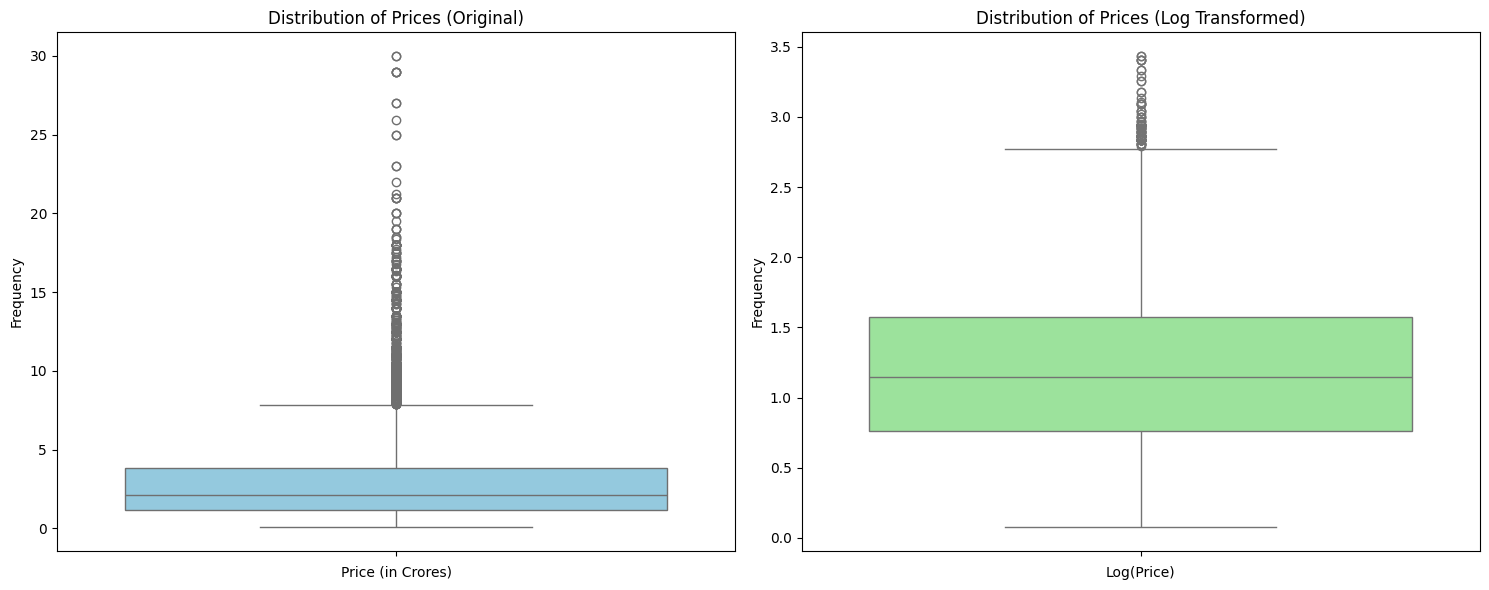

In [82]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### bedRoom

In [83]:
df['bedrooms'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedrooms'>

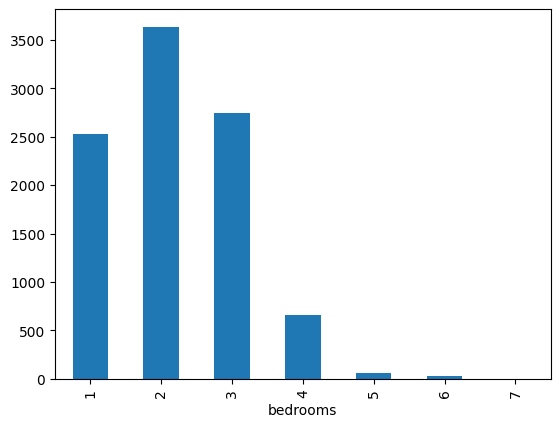

In [84]:
df['bedrooms'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

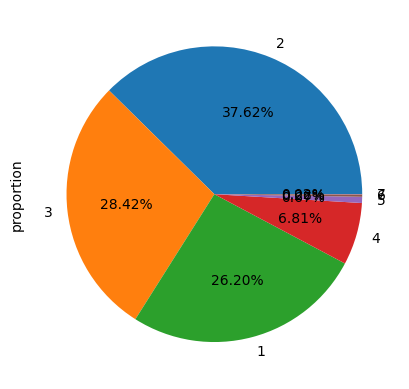

In [85]:
df['bedrooms'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [86]:
df['bathrooms'].isnull().sum()

np.int64(0)

<Axes: xlabel='bathrooms'>

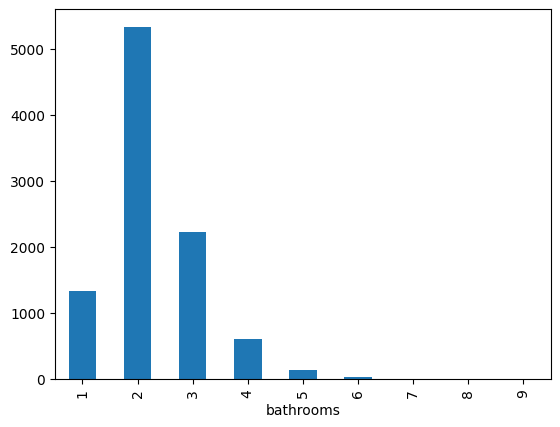

In [87]:
df['bathrooms'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

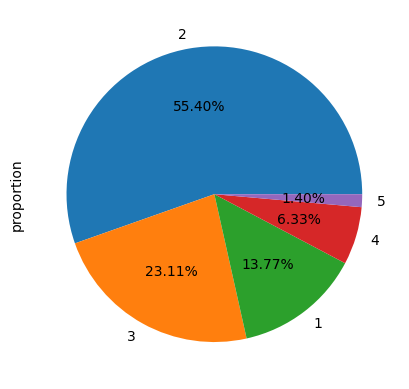

In [88]:

df['bathrooms'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [89]:

df.sample()

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
6614,3.25,3,3,0,modern property,Mulund West,1300.0,Furnished


### balcony

In [90]:
df['balcony'].isnull().sum()


np.int64(0)

<Axes: xlabel='balcony'>

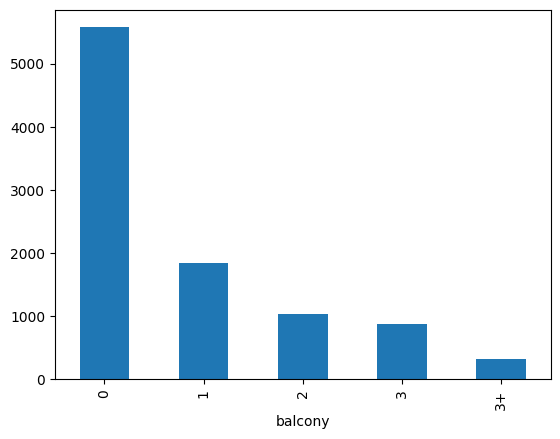

In [91]:
df['balcony'].value_counts().plot(kind='bar')


<Axes: ylabel='proportion'>

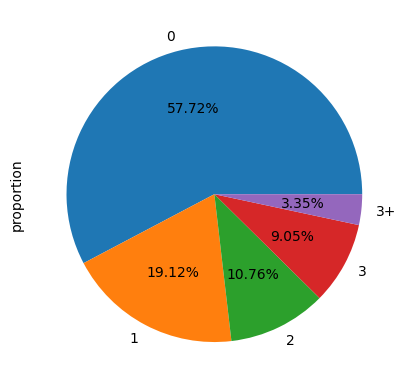

In [92]:

df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')


### agePossession

In [93]:
df['property_age'].isnull().sum()

np.int64(17)

In [94]:
df['property_age'].value_counts()

property_age
recent construction    3731
new construction       1984
modern property        1316
Relatively New          969
New Property            494
Old Property            358
Moderately Old          336
mid age property        310
Undefined               139
old propert               6
Name: count, dtype: int64

In [95]:
df['built_up_area'].isnull().sum()

np.int64(0)

In [96]:

df['built_up_area'].describe()

count    9660.000000
mean     1099.737702
std       596.069021
min        39.000000
25%       675.000000
50%       950.000000
75%      1335.000000
max      5800.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

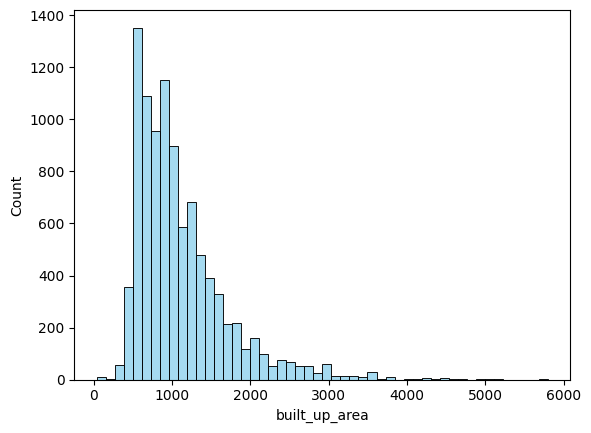

In [97]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

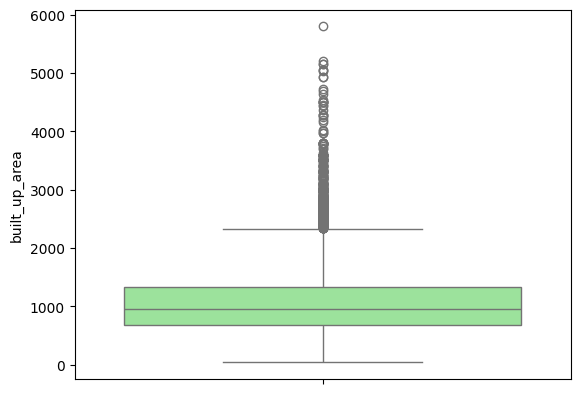

In [98]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

### furnishing_type

In [99]:
df['furnishing_type'].value_counts()

furnishing_type
Furnished      5481
Unfurnished    4179
Name: count, dtype: int64

In [100]:
df[df['furnishing_type']=='furnishing_type']

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type


<Axes: ylabel='count'>

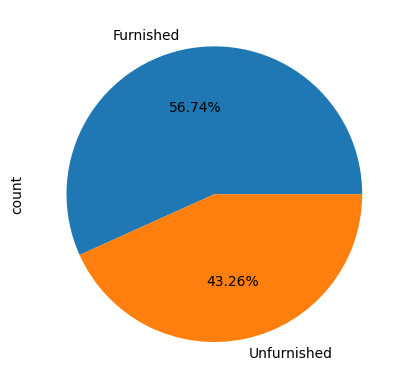

In [101]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [102]:
df.sample()

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
8257,5.5,4,3,3,recent construction,Chembur,1700.0,Furnished
